<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
# импортируем библиотеки
import pandas as pd
import psycopg2
import plotly.express as px

In [3]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [2]:
# подключаемся к базе
connection = psycopg2.connect(
    dbname='project_sql',
    user='skillfactory',
    host='84.201.134.129',
    password='cCkxxLVrDE8EbvjueeMedPKt',
    port=5432
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [3]:
# текст запроса
query_1 = f'''
            select count(v.*)
            from vacancies v
            '''

In [4]:
# результат запроса
result_1 = pd.read_sql_query(query_1, connection)
display(result_1)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\2142269139.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_1 = pd.read_sql_query(query_1, connection)


,count
0,49197


#### В нашей таблице о вакансиях в области IT находится около 50 000 вакансий. Если предположить, что в таблице содержатся данные о 1300 регионах, то на каждый регион приходится примерно 38 вакансий.
#### Откуда у нас столько вакансий, и много ли это? Эта компания работает с 119 странами мира и является третьей самой популярной рекрутинговой компанией в мире. Из этого я могу предположить, что в нашей таблице достаточно много IT-вакансий.

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [7]:
# текст запроса
query_2 = f'''select count(e.name)
            from employers e
            '''

In [8]:
# результат запроса
result_2 = pd.read_sql_query(query_2, connection)
display(result_2)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\269379789.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_2 = pd.read_sql_query(query_2, connection)


,count
0,23501


#### Половина всех вакансий занимают работодатели (23 500 тыс. раб. из 50 000 тыс. всех вакансий). 
#### Откуда у нас так много работодателей? Большинству крупных компаний постоянно требуются много специалистов, поэтому они могут выставлять сразу несколько вакансий в различных сферах деятельности.

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [9]:
# текст запроса
query_3 = f'''select count(distinct a.name)
            from areas a
            '''

In [10]:
# результат запроса
result_3 = pd.read_sql_query(query_3, connection)
display(result_3)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\185323650.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_3 = pd.read_sql_query(query_3, connection)


,count
0,1362


#### В нашей таблице находятся вакансии из 1362 регионов. Откуда у нас столько регионов? Ведь только в России на данный момент насчитывается 1118 городов. Дело в том, что эта компания предоставляет доступ к своим услугам в 119 странах мира. Из этого можно сделать вывод, что эта компания работает по всему миру и имеет много клиентов.

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [11]:
# текст запроса
query_4 = f'''select count(distinct i.name)
            from industries i
            ''' 

In [12]:
# результат запроса
result_4 = pd.read_sql_query(query_4, connection)
display(result_4)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\638255518.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_4 = pd.read_sql_query(query_4, connection)


,count
0,294


#### В нашей таблице насчитывается около 300 сфер деятельности. Этого достаточно, чтобы сказать, что на сайте очень много работодателей с разными сферами деятельности. Это также подтверждает популярность этого сайта среди соискателей, независимо от их сферы деятельности.

***

### Выводы по предварительному анализу данных
### Подведём небольшие итоги:
- количество вакансий 49197
- количество работадателей 23501
- количество регионов 1362
- количество сфер деятельности 294

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
# текст запроса
query_5 = f'''select a.name,
                    count(v.area_id)
            from vacancies v
            join areas a on a.id = v.area_id
            group by 1
            order by 2 desc
            limit 5
            '''

In [14]:
# результат запроса
result_5 = pd.read_sql_query(query_5, connection)
display(result_5)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\1926595251.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_5 = pd.read_sql_query(query_5, connection)


,name,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


#### Мы видим, что в пятерку лидеров по вакансиям на регион попадают такие большие города как: Москва, Санкт-Петербург, Минск, Новосибирск и Алматы.
#### Почему по количеству вакансий лидируют именно эти города? Эти города имеют крупные предприятия, компании и организации, которые предлагают большое количество рабочих мест. Также, такие города обладают развитой инфраструктурой и доступом к различным услугам, что делает их привлекательными для работников. Все эти факторы в совокупности способствуют высокому количеству вакансий в этих городах.

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
# текст запроса
query_6 = f'''select count(v.*)
            from vacancies v
            where salary_from is not null or salary_to is not null
            ''' 

In [16]:
# результат запроса
result_6 = pd.read_sql_query(query_6, connection)
display(result_6)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\3505228012.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_6 = pd.read_sql_query(query_6, connection)


,count
0,24073


#### В нашей таблице у половины вакансий заполнено хотя бы одно заработное поле. Это значит, что соискатели и работодатели заранее определяют для себя заработной минимум или максимум. Возможно, те, кто не указывают ни одного заработного поля, хотят получить больше откликов и разных предложений с разными заработными платами.

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
# текст запроса
query_7 = f'''select round(avg(salary_from)) as salary_from,
                    round(avg(salary_to)) as salary_to
            from vacancies v
            ''' 

In [18]:
# результат запроса
result_7 = pd.read_sql_query(query_7, connection)
display(result_7)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\4196778817.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_7 = pd.read_sql_query(query_7, connection)


,salary_from,salary_to
0,71065.0,110537.0


#### В нашей таблице средним значением нижней границы заработной платы является 71 000 руб., а верхняя граница равна 110 000 руб.
#### Почему именно такие цифры и кто в основном влияет на такую статистику?
#### В нашей таблице (26,000 вакансий с опытом работы от 1 года до 3 лет, а это чуть больше половины наших вакансий), то есть это в основном специалисты джуниор уровня. На данный момент специалист джуниор уровня получает в среднем от 60,000 руб. до 80,000 руб. Однако, около 15,000 вакансий с опытом работы от трех до шести лет, люди с таким стажем могут работать специалистами мидл уровня. Это также создает влияние на границы заработных плат в наших данных, на данный момент мидлы могут зарабатывать от 100,000 руб. до 140,000 руб., и если брать специалистов с опытом работы (более 6 лет, таких специалистов в нашей таблице достаточно мало всего 1300 тыс. вакансий), со средней заработной платой от 150,000 руб. до 300,000 руб., то можно сделать вывод, что большиство вакансий это джуниоры и мидлы, именно из их средних границ заработных плат, создаются наши нижние и верхние границы.

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
# текст запроса
query_8 = f'''select v.schedule,
                v.employment,
                count(v.*)
            from vacancies v
            group by 1, 2
            order by 3 desc
        '''

In [20]:
# результат запроса
result_8 = pd.read_sql_query(query_8, connection)
display(result_8)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\3133710946.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_8 = pd.read_sql_query(query_8, connection)


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


#### Самым популярным сочетанием является "Полный день : Полная занятость".
#### Почему с большим отрывом именно это сочетание является самым популярным? Тип рабочего графика "Полный день" является наиболее востребованным и наиболее высокооплачиваемым, так как люди с полным рабочим днём работают больше. Тип трудоустройства "Полная занятость", также является наиболее востребованным и наиболее высокооплачиваемым, так как полная занятость означает, что это основная и постоянная работа, это то что и нужно соискателю и работадателю.
#### Почему Тип рабочего графика "Удалённая работа", проигрывает полному дню по количеству вакансий? Удалённая работа наименее популярна, чем полный день, работадателю удобнее иметь сотрудника в штате на полный рабочий день, для возможности его контролировать.

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
# текст запроса
query_9 = f'''select v.experience,
                    count(v.*)
            from vacancies v
            group by 1
            order by 2
            '''

In [22]:
# результат запроса
result_9 = pd.read_sql_query(query_9, connection)
display(result_9)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\789061708.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_9 = pd.read_sql_query(query_9, connection)


,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


##### Почему самым не многочисленным опытом работы является "От 1 года до 3 лет", а самым малочисленным является "Более 6 лет"?
##### Начнём с самого многочисленного, так как опыт работы от 1 года до 3 лет является чем-то средним, так как опыт есть, но и небольшой, для работадателя это означает, что соискатель уже знаком с профессией на практике и у него есть реальный опыт работы. Для соискателя такой опыт работы может означать, что он уже работал на данной профессии, но за меньшую заработную плату и поэтому решил поменять место работы, на более оплачиваемою работу
#### Итак почему самым малочисленным опытом работы является "Более 6 лет"? Я считаю, что специалистов с большим опытом работы, разбирают крупные компаниии, которые нуждаются в специалистах такого высокого уровня, они предлагают им крупные заработные платы, хорошие условия, льготы и т.п., поэтому специалистов с таким большим опытом работы очень быстро берут на работы крупные компании, которые в них нуждаются

***

### выводы по детальному анализу вакансий
#### По детальному анализу данных я понял, что компания "HeadHunter" работает по всему миру, вследствие чего, у неё очень много разных вакансий, с разными IT сферами.
#### Небольшие итоги по заданиям
- По количеству вакансий лидируют большие города миллионники, такие как: Москва, Санкт-Петербург и Минск
- У 48% вакансий заполнено хотя бы одно из двух полей с зарплатой
- Среднее значение верхней границы заработной вилки 110,000 руб, а нижней 71,000 руб, нижняя граница на 30% больше, чем средняя зарплата в Российской Федерации (55,000 руб)
- Самыми популярными сочетаниями графика работы и типа трудоустройства являются: (Полный день : Полная занятость), (Удалённая работа : Полная занятость), (Гибкий график : Полная занятость)
- Самым многочисленным опытом работы является - от 1 года до 3 лет

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [23]:
# текст запроса
query_10 = f'''select e.name,
                    count(v.*)
            from employers e
            join vacancies v on e.id = v.employer_id
            group by 1
            order by 2 desc
            limit 6
            '''

In [24]:
# результат запроса
result_10 = pd.read_sql_query(query_10, connection)
display(result_10)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\513475939.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_10 = pd.read_sql_query(query_10, connection)


,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
5,ИК СИБИНТЕК,327


#### Самой многочисленной компанией является Яндекс 1933 вакансии, У этой компании 25000 сотрудников, большинство которых связаны с IT сферами, а у других компаний и банков в этом топ-5, не явное большинство сотрудников связаны с IT сферами, а так как наша таблица имеет данные именно про IT вакансии, то большинство из всех вакансий IT относится именно к Яндексу

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [25]:
query_11 = f'''select a.name,
                    count(distinct e.id) as employer_count
                from areas a
                left join employers e on e.area = a.id
                left join vacancies v on v.area_id = a.id
                group by 1
                having count(v.id) = 0
                order by 2 desc
                limit 1
            '''

In [20]:
# результат запроса
result_11 = pd.read_sql_query(query_11, connection)
display(result_11)
# Вывод Россия 401, просто этот код очень долго работает и я случайно запустил его второй раз, но ждать нет времени, но весь код работает)

C:\Users\79654\AppData\Local\Temp\ipykernel_11648\52658179.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



#### Скорее всего ответ такой: регион Россия, 401 вакансия. Так как работодатели могут указывать регион регистрации компании или страну, а соискатели обычно указывают город, в котором живут или куда могут переехать, но не страну.
#### Ну а почему именно Россия? Скорее всего, из всех стран (регионов) здесь просто больше вакансий, и поэтому шанс такого варианта указания страны выше.

Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии.

Выберите максимальное значение из получившегося списка.

In [26]:
# текст запроса
query_12 = f'''select e.name,
                    count(distinct v.area_id)
            from employers e
            join vacancies v on e.id = v.employer_id
            group by 1
            order by 2 desc
            limit 1
            ''' 

In [27]:
# результат запроса
result_12 = pd.read_sql_query(query_12, connection)
display(result_12)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\1848352006.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_12 = pd.read_sql_query(query_12, connection)


,name,count
0,Яндекс,181


#### Компания Яндекс является компанией, которая собирает соискателей из самого большого количества регионов (181 регион).
#### Почему именно Яндекс? Мы уже знаем, что у Яндекса самое большое количество вакансий в нашей таблице. То есть, Яндексу постоянно нужны новые сотрудники в IT-индустрии. Поэтому Яндекс набирает своих сотрудников со всего мира.

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [28]:
# текст запроса
query_13 = f'''select count(distinct e.id) as is_null
            from employers_industries e_i
            right join employers e on e.id = e_i.employer_id 
            where e_i.industry_id is null
            ''' 

In [29]:
# результат запроса
result_13 = pd.read_sql_query(query_13, connection)
display(result_13)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\890221114.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_13 = pd.read_sql_query(query_13, connection)


,is_null
0,8419


#### В нашей таблице у 35% работадателей не указана сфера деятельности.
#### Почему некоторые не указывают сферу деятельности? Возможно не все работадатели являются крупными компаниями, которые должны указывать сферу деятельности, но это всё равно не оправдывает, того что один из трёх работадателей не указывает сферу деятельности.
#### Я считаю, что для ответа на этот вопрос нужно дополнительное исследование, для того, чтобы понять, компании какого типа зачастую не указывают сферу деятельности или найти взаимосвязь между признаками компаний, которые не указывают сферу деятельности.

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [30]:
# текст запроса
query_14 = f'''select e.name
            from employers_industries e_i
            right join employers e on e.id = e_i.employer_id 
            group by 1
            having count(e_i.industry_id) = 4
            order by e.name asc
            offset 2 limit 1
            ''' 

In [31]:
# результат запроса
result_14 = pd.read_sql_query(query_14, connection)
display(result_14)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\659724651.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_14 = pd.read_sql_query(query_14, connection)


,name
0,2ГИС


#### Про эту компанию я могу сказать только то, что она указала четыре сферы деятельности, что может значит, что эта компания сразу даёт всем понять чем конкретно она занимается.

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [32]:
# текст запроса
query_15 = f'''select count(e.name)
            from employers_industries e_i
            right join employers e on e.id = e_i.employer_id
            right join industries i on i.id = e_i.industry_id
            where i.name = 'Разработка программного обеспечения'
            '''

In [33]:
# результат запроса
result_15 = pd.read_sql_query(query_15, connection)
display(result_15)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\73911374.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_15 = pd.read_sql_query(query_15, connection)


,count
0,3553


In [34]:
query = f'''select i.name,
                count(e.id)
            from employers_industries e_i
            right join employers e on e.id = e_i.employer_id
            right join industries i on i.id = e_i.industry_id
            group by 1
            order by 2 desc
            '''
            
result = pd.read_sql_query(query, connection)
display(result)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\488777743.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(query, connection)


,name,count
0,Разработка программного обеспечения,3553
1,"Системная интеграция, автоматизации технологи...",2993
2,"Интернет-компания (поисковики, платежные систе...",1675
3,"Маркетинговые, рекламные, BTL, дизайнерские, E...",798
4,Консалтинговые услуги,662
...,...,...
289,"Лифтовое хозяйство (монтаж, сервис, ремонт)",4
290,Ритуальные услуги,4
291,"Ботанический сад, зоопарк, заповедник",3
292,Автошкола,3


#### В наших данных саммой многочисленной сферой деятельности является "Разработка программного обеспечения" (3553 тыс. вакансий), из этого можно сделать вывод, что с каждым годом всё большему количеству компаний нужны приложения и сайты, а также люди, которые их создают.

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [35]:
import urllib.parse as req # Импортируем библиотеку requests
path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_Городов_Миллионеров') # Определяем адрес страницы
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment) # Создаём ссылку

url

'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%9C%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D0%BE%D0%B2'

In [36]:
table = pd.read_html('https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%9C%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D0%BE%D0%B2')
df = table[1]

cities = tuple(df['Город'])
print(cities)

('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [37]:
# текст запроса
query_16 = f'''with x as
                (
               select a.name,
                    count(v.id) as cnt
            from employers_industries e_i
            right join employers e on e.id = e_i.employer_id
            right join industries i on i.id = e_i.industry_id
            join vacancies v on v.employer_id = e_i.employer_id
            join areas a on a.id = v.area_id
            where e.name = 'Яндекс' and a.name in {cities}
            group by 1
            order by 2 desc
            )
            
            select *
            from x
            
            union all
            
            select 'total', sum(cnt)
            from x
            '''

In [38]:
# результат запроса
result_16 = pd.read_sql_query(query_16, connection)
display(result_16)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\3681598448.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_16 = pd.read_sql_query(query_16, connection)


,name,cnt
0,Москва,54.0
1,Санкт-Петербург,42.0
2,Екатеринбург,39.0
3,Нижний Новгород,36.0
4,Новосибирск,35.0
5,Воронеж,32.0
6,Краснодар,30.0
7,Самара,26.0
8,Уфа,26.0
9,Казань,25.0


***

#### В Москве самое большое количество вакансий компании Яндекс из всех российских городов-миллионников.
#### 485 это общее количество вакансий в российских городах-миллионников, всего у Яндекса 1993 вакансии на hh.ru, то есть в городах-миллионниках сосредоточено всего 25% от всего количества вакансий этой компании.

### Выводы по анализу работадателей
#### Компанией с самым большим количеством вакансий и регионов является "Яндекс".
#### У 35% работадателей не указана сфера деятельности.
#### Самой многочисленной сферой деятельности является "Разработка программного обеспечения"

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [39]:
# текст запроса
query_17 = f'''select count(v.name)
            from vacancies v
            where v.name like upper('%data%') or v.name like '%data%' or v.name like upper('%данн%') or v.name like '%данн%' or v.name like '%Данн%' or v.name like '%Data%'
            '''

In [40]:
# результат запроса
result_17 = pd.read_sql_query(query_17, connection)
display(result_17)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\1007169700.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_17 = pd.read_sql_query(query_17, connection)


,count
0,1771


#### 1771 это количество вакансий, которые относятся к работе с данными, суда входят все профессии в названии, которых упоминаются приставки "Data" и "Данн."

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [41]:
# текст запроса
query_18 = f'''select count(v.name)
            from vacancies v
            where (v.name ilike '%data scientist%' or v.name ilike '%data science%'
            or v.name ilike '%исследователь данных%' or (v.name like '%ML%' and v.name not ilike '%HTML%')
            or v.name ilike '%machine learning%' or v.name ilike '%машин%обучен%')
            and (v.name ilike '%junior%' or v.name like '%Junior%' or v.experience = 'Нет опыта' or v.employment = 'Стажировка')
            '''

In [42]:
# результат запроса
result_18 = pd.read_sql_query(query_18, connection)
display(result_18)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\2990032066.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_18 = pd.read_sql_query(query_18, connection)


,count
0,51


In [43]:
# Это доп. код, чтобы узнать сколько всего дата саинтестов любого уровня есть у нас в таблице 
query = f'''select count(v.name)
            from vacancies v
            where (v.name ilike '%data scientist%' or v.name ilike '%data science%'
            or v.name ilike '%исследователь данных%' or (v.name like '%ML%' and v.name not ilike '%HTML%')
            or v.name ilike '%machine learning%' or v.name ilike '%машин%обучен%')
            '''
result = pd.read_sql_query(query, connection)
display(result)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\570114667.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(query, connection)


,count
0,480


In [44]:
# Этот код для того, чтобы посчитать дата саинтестов с без опыта работы и с опытом работы от 1 года до трех лет
query = f'''select count(v.name)
            from vacancies v
            where (v.name ilike '%data scientist%' or v.name ilike '%data science%'
            or v.name ilike '%исследователь данных%' or (v.name like '%ML%' and v.name not ilike '%HTML%')
            or v.name ilike '%machine learning%' or v.name ilike '%машин%обучен%')
            and (v.name ilike '%junior%' or v.name like '%Junior%' or v.experience = 'Нет опыта' or v.employment = 'Стажировка' or v.experience = 'От 1 года до 3 лет')
            '''
result = pd.read_sql_query(query, connection)
display(result)        

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\1929665792.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(query, connection)


,count
0,251


#### В нашей таблице 51 вакансия на профессию "Data Scientist" джуниор уровня, от всех вакансий с работой о данных (1771 вакансия) это состовляет всего 3%, а от всех вакансий по профессии "Data Scientist" (480 вакансий) это состовляет 11%, то есть каждый десятый дата саинтест в нашей таблице является джуниором.
#### Дата саинтестов джуниор уровня достаточно мало, но это если считать, что джуниор - это дата саинтест без опыта работы, если в эту группу включить дата саинтестов с опытом работы (от 1 года до 3 лет), то количество дата саинтестов джуниор уровня вырастит в пять раз и составит (251 вакансию), теперь каждый второй дата саинтест - джуниор уровня.


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [45]:
# текст запроса
query_19 = f'''select count(v.name)
            from vacancies v
            where (v.name ilike '%data scientist%' or v.name ilike '%data science%'
            or v.name ilike '%исследователь данных%' or (v.name like '%ML%' and v.name not ilike '%HTML%')
            or v.name ilike '%machine learning%' or v.name ilike '%машин%обучен%')
            and (v.key_skills ilike '%SQL%' or v.key_skills ilike '%postgres%')
            '''

In [46]:
# результат запроса
result_19 = pd.read_sql_query(query_19, connection)
display(result_19)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\2119383328.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_19 = pd.read_sql_query(query_19, connection)


,count
0,201


In [47]:
# количество DS вакансий с ключевым навыком Python
query = f'''select count(v.name)
            from vacancies v
            where (v.name ilike '%data scientist%' or v.name ilike '%data science%'
            or v.name ilike '%исследователь данных%' or (v.name like '%ML%' and v.name not ilike '%HTML%')
            or v.name ilike '%machine learning%' or v.name ilike '%машин%обучен%')
            and (v.key_skills ilike '%python%' or v.key_skills like '%Python%')
            '''
result = pd.read_sql_query(query, connection)
display(result)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\1195968323.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(query, connection)


,count
0,351


#### В 201 вакансиях на позицию "Data Scientist" работодатели указывают в качестве ключевого навыка владение SQL. 
#### Однако чаще работодатели указывают в качестве ключевого навыка владение Python. Но почему?
#### Умение владеть обоими этими языками программирования одинаково важно. Однако чаще работодатели указывают именно Python, скорее всего потому, что на Python проводится основная часть работы над проектом в профессии "Data Scientist", а также освоить базовые понятия SQL легче и быстрее., чем с нуля освоить Python
#### Но чаще всего работадатели указывают владение обоими этими языками программирования в своих вакансия, на позицию "Data Scientest"

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [48]:
# текст запроса
query_20 = f'''select count(v.name)
            from vacancies v
            where (v.name ilike '%data scientist%' or v.name ilike '%data science%'
            or v.name ilike '%исследователь данных%' or (v.name like '%ML%' and v.name not ilike '%HTML%')
            or v.name ilike '%machine learning%' or v.name ilike '%машин%обучен%')
            and (v.key_skills like '%python%' or v.key_skills like '%PYTHON%' or v.key_skills ilike '%Python%')
            '''

In [49]:
# результат запроса
result_20 = pd.read_sql_query(query_20, connection)
display(result_20)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\3375712033.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_20 = pd.read_sql_query(query_20, connection)


,count
0,351


#### В 201 вакансиях на позицию "Data Scientist" работодатели указывают в качестве ключевого навыка владение SQL. 
#### Однако чаще работодатели указывают в качестве ключевого навыка владение Python. Но почему?
#### Умение владеть обоими этими языками программирования одинаково важно. Однако чаще работодатели указывают именно Python, скорее всего потому, что на Python проводится основная часть работы над проектом в профессии "Data Scientist", а также освоить базовые понятия SQL легче и быстрее., чем с нуля освоить Python
#### Но чаще всего работадатели указывают владение обоими этими языками программирования в своих вакансия, на позицию "Data Scientest"

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [50]:
# текст запроса
query_21 = f'''select round(avg(length(v.key_skills) - length(replace(v.key_skills,CHR(9),''))+1), 2)
            from vacancies v
            where (v.name ilike '%data scientist%' or v.name ilike '%data science%'
            or v.name ilike '%исследователь данных%' or (v.name like '%ML%' and v.name not ilike '%HTML%')
            or v.name ilike '%machine learning%' or v.name ilike '%машин%обучен%') and v.key_skills is not null
            '''

In [51]:
# результат запроса
result_21 = pd.read_sql_query(query_21, connection)
display(result_21)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\1370682270.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_21 = pd.read_sql_query(query_21, connection)


,round
0,6.41


#### В большинстве случаев работодатели, в среднем, указывают 6 ключевых навыков для той или иной вакансии. 
#### Почему именно шесть? Скорее всего, именно это число навыков в среднем хватает работодателю. Туда часто входят: SQL, Python, машинное обучение, математика, статистика и многое другое.

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [52]:
# текст запроса
query_22 = f'''select distinct(v.experience) as exp,
                            round(avg(coalesce((salary_to + salary_from) / 2, salary_to, salary_from)), 0)
            from vacancies v
            where (v.name ilike '%data scientist%' or v.name ilike '%data science%'
            or v.name ilike '%исследователь данных%' or (v.name like '%ML%' and v.name not ilike '%HTML%')
            or v.name ilike '%machine learning%' or v.name ilike '%машин%обучен%')
            group by 1
            '''

In [53]:
# результат запроса
result_22 = pd.read_sql_query(query_22, connection)

display(result_22)

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\3694482925.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_22 = pd.read_sql_query(query_22, connection)


,exp,round
0,Более 6 лет,NaN
1,Нет опыта,74643.0
2,От 1 года до 3 лет,139675.0
3,От 3 до 6 лет,243115.0


***

#### Средние заработные платы, для каждого опыта работы у нас такие (Нет опыта : 74,000 руб., От 1 года до 3 лет : 140,000 руб., От 3 до 6 лет : 245,000 руб.).
#### Можно сопоставить это так (Джуниор (Нет опыта) : 74,000 руб., мидл (От 1 года до 3 лет) : 140,000 руб., сеньор (От 3 до 6 лет) : 245,000 руб.), это соответствует реалиям, так как столько в среднем зарабатывают дата саинтесты этих уровней.

### Выводы по предметному анализу
#### У нас 1771 вакансия на специалистов по данным, 480 вакансий на дата саинтеста, 251 вакансия на дата саинтеста джуниор уровня (если брать дата саинтестов без опыта работы и с опытом от 1 года до 3 лет) и 51 вакансия на дата саинтеста джуниор уровня (если брать дата саинтестов только без опыта работы).
#### В среднем дата саинтесты джуниор уровня зарабатывают (74,000 руб.), мидл уровня (140,000) и сеньоры (250,000).

# Общий вывод по проекту

### подведем итог исследования, обобщите выводы
#### В процессе анализа всех данных я понял, что в нашем датасете очень много вакансий, регионов и множество работодателей, а также около 300 разных IT-сфер.
#### Самой активной компанией является "Яндекс". У этой компании самое большое количество вакансий и регионов.
#### Самой многочисленной сферой деятельности является "Разработка программного обеспечения".
#### Также в наших данных собрано около 250 дата саинтестов разного уровня, от джуниор уровня до сеньора с опытом работы более 6 лет и заработной платой от 150000 рублей.
### здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования
#### В доп. исследованиях можно рассмотреть зависимость средней заработной платы от типа трудоустройства и типа графика, чтобы в будущем можно было предсказать среднею заработную плату в разных сочетаниях типа трудоустройства и типа графика.

C:\Users\79654\AppData\Local\Temp\ipykernel_21948\2891048530.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



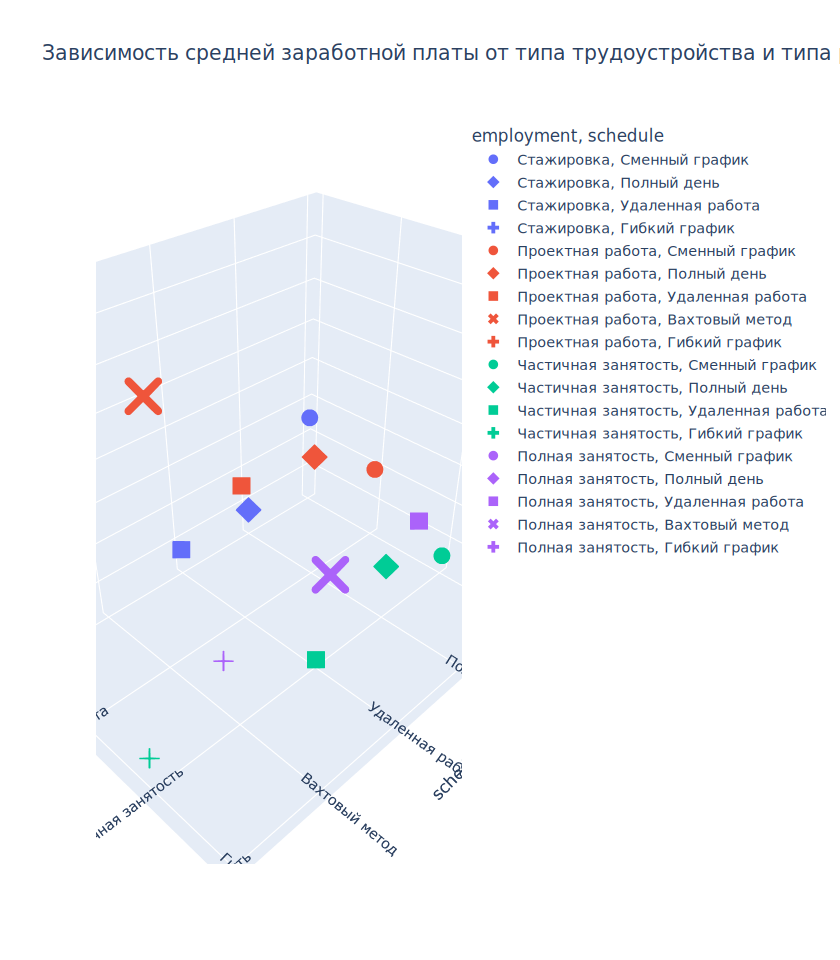

In [62]:
# доп. исследование "Зависимость средней заработной платы от типа трудоустройства и типа рабочего графика"

import plotly.io as pio

query_1_add = f'''select v.schedule as schedule,
                        v.employment as employment,
                        round(avg(coalesce((salary_to + salary_from) / 2, salary_to, salary_from)), 0) as mean
            from vacancies v
            group by 1, 2
            '''
result_1_add = pd.read_sql_query(query_1_add, connection)
scatter_3d = px.scatter_3d(data_frame=result_1_add, x='schedule', y='employment', z='mean', symbol='schedule', color='employment', height=800, title='Зависимость средней заработной платы от типа трудоустройства и типа рабочего графика')
scatter_3d.show()
pio.write_html(scatter_3d, file='figure.html', auto_open=True)
pio.write_html(scatter_3d, file='figure_1.png', auto_open=True)

{% include figure.png %}

#### На этом графике мы можем видеть, что самым высокооплачиваемым сочетанием типа графика и типа трудоустройства является «Проектная работа: Гибкий график».

#### Почему именно такое сочетание? Скорее всего, при «Гибком графике» работы специалист может сам выбирать время начала и окончания работы. Тем самым он может выбрать то время, когда он наиболее эффективен и подготовлен к работе. Для работодателя это значит, что соискатель всегда готов к работе.Теперь рассмотрим тип трудоустройства "Проектная работа", при этом типе платят больше, так как специалист работающий по такому типу работы, должен работать с другими участниками проекта и согласовывать с ними много моментов и планов, а также если это крупный проект, то значит он важен для компании.
#### Также из графика видно, что самым малооплачиваемым сочетанием типа графика и типа трудоустройства является (Частичная занятость : Удаленная работа).
#### Но почему именно это сочетание самое малооплачиваемое? За тип трудоустройства - частичная занятость, в целом платят достаточно мало (не больше 50,000 руб.). Дело в том, что для работодателя это может означать, что специалист не полностью вовлечен в работу, так как работает не полный день и может иметь даже вторую работу. Далее, тип графика - удаленная работа, для соискателя это достаточно удобно, но для работадателя это может означать, что он не может в полной мере контролировать своего сотрудника, однако за удаленную работу платят по разному, в зависимости от типа трудоустройства.
#### Из этого графика мы узнали, что самым высокооплачиваемым сочетанием типа графика и типа трудоустройства является «Проектная работа: Гибкий график», а самым малооплачиваемым является сочетание «Частичная занятость : Удаленная работа».